<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Environment" data-toc-modified-id="Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Environment</a></span></li><li><span><a href="#Building-a-Decision-Tree" data-toc-modified-id="Building-a-Decision-Tree-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building a Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Quandl---Getting-the-data" data-toc-modified-id="Quandl---Getting-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Quandl - Getting the <a href="https://blog.data.nasdaq.com/api-for-currency-data" target="_blank">data</a></a></span></li><li><span><a href="#YahooFinance---Getting-the-data" data-toc-modified-id="YahooFinance---Getting-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>YahooFinance - <a href="https://aroussi.com/post/python-yahoo-finance" target="_blank">Getting the data</a></a></span></li><li><span><a href="#Creating-the-predictors" data-toc-modified-id="Creating-the-predictors-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Creating the predictors</a></span></li><li><span><a href="#Creating-the-target-variables" data-toc-modified-id="Creating-the-target-variables-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Creating the target variables</a></span></li><li><span><a href="#Obtaining-the-data-set-for-decision-trees" data-toc-modified-id="Obtaining-the-data-set-for-decision-trees-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Obtaining the data set for decision trees</a></span><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Regression</a></span></li></ul></li><li><span><a href="#Splitting-the-data-into-training-and-testing-data-sets" data-toc-modified-id="Splitting-the-data-into-training-and-testing-data-sets-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Splitting the data into training and testing data sets</a></span><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Regression</a></span></li></ul></li><li><span><a href="#Decision-Trees-for-Classification" data-toc-modified-id="Decision-Trees-for-Classification-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Decision Trees for Classification</a></span><ul class="toc-item"><li><span><a href="#Visualize-Decision-Trees-for-Classification" data-toc-modified-id="Visualize-Decision-Trees-for-Classification-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Visualize Decision Trees for Classification</a></span></li></ul></li><li><span><a href="#Performance-analysis" data-toc-modified-id="Performance-analysis-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Performance analysis</a></span><ul class="toc-item"><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-2.8.1"><span class="toc-item-num">2.8.1&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#ROC-curve" data-toc-modified-id="ROC-curve-2.8.2"><span class="toc-item-num">2.8.2&nbsp;&nbsp;</span>ROC curve</a></span></li></ul></li></ul></li></ul></div>

<img src="images/Tarjeta.png">

# Decision Tree For Trading Using Python

By [Mario Pisa Peña](https://twitter.com/mariodevelop)

Decision Trees, are a Machine Supervised Learning method used in Classification and Regression problems, also known as CART.

Remember that a Classification problem tries to classify unknown elements into a class or category; the output always are categorical variables (i.e. yes/no, up/down, red/blue/yellow, etc.)

A Regression problem tries to forecast a number such as the return for the next day. It must not be confused with linear regression which is used to study the relationship between variables. Although the classification and regression problems have different objectives, the trees have the same structure:

- The Root node, is at the top and has no incoming pathways.

- Internal nodes or test nodes are at the middle and can be at different levels or sub-spaces, and have incoming and outgoing pathways.

- Leaf nodes or decision nodes are at the bottom, have incoming pathways but no outgoing pathways and here we can find the expected outputs.

<img src="images/DecisionTreeTheory.png">

Thanks to Python’s Sklearn library, the tree is automatically created for us taking as a starting point the predictor variables that we hypothetically think are responsible for the output we are looking for.

In this introduction post to decision trees, we will create a classification decision tree in Python to make forecasts about whether the financial instrument we are going to analyze will go up or down the next day.

We will also [make a decision tree](https://quantra.quantinsti.com/course/decision-trees-analysis-trading-ernest-chan?_gl=1%2am4y7uo%2a_ga%2aMTAxMjU5ODgxMC4xNjM2ODEwMzQy%2a_ga_SXP1W7WL9G%2aMTYzNjgxMDM0MS4xLjEuMTYzNjgxMTM2My4w) to forecasts about the concrete return of the index the next day.

## Environment


- Python 3.8.12
- Pandas library for data structure (version=1.3.4)
- Numpy library with scientific mathematical functions (version=1.21.4).
- Quandl library to retrieve market data ([Python Tutorial Installation](https://docs.data.nasdaq.com/docs/python-installation)
- Ta-lib library to calculate technical indicators
- Sklearn Machine Learning library to build the trees and perform analysis among many others things (1.0.1)
- Graphviz library to plot the tree

In [102]:
import pandas as pd
import numpy as np
import quandl
import talib
import sklearn
import graphviz
import os
import configparser
import requests
from pprint import PrettyPrinter
import tradermade
import yfinance as yf
import mplfinance as mpf
from datetime import datetime, timedelta
import sys
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Building a Decision Tree

Building a classification [decision tree](https://www.saedsayad.com/decision_tree.htm) or a [regression decision tree](https://www.saedsayad.com/decision_tree_reg.htm) is very similar in the way we organize the input data and predictor variables, then, by calling the corresponding functions, the classification decision tree or regression decision tree will be automatically created for us according to some criteria we must specify ([skelarn](https://scikit-learn.org/stable/modules/tree.html)).

The main steps to build a decision tree are:

1. Retrieve market __data__ for a financial instrument.
2. Introduce the Predictor variables (i.e. [Technical indicators](https://www.investopedia.com/terms/t/technicalindicator.asp#:~:text=Technical%20indicators%20are%20heuristic%20or,to%20predict%20future%20price%20movements.), [Sentiment indicators](https://www.investopedia.com/terms/s/sentimentindicator.asp), [Breadth indicators](https://www.investopedia.com/terms/b/breadthindicator.asp), etc.)
3. Setup the __Target__ variable or the desired output.
4. __Split__ data between training and test data.
5. Generate the decision tree __training__ the model.
6. __Testing__ and __analyzing__ the model.


If we look at the first four steps, they are common operations for data processing. If you are a newcomer to decision trees the predictor and target variables may sound exotic to you. However, they are nothing more than additional columns in the data frame that contain some type of indicator. These indicators or predictors are used to predict the target variable that is the financial instrument will go up or down for the classification model, or the future price level for the regression model. Likewise, splitting data is a mandatory task in any backtesting process (ML or not), the idea is to have one set of data to train the model and another set of data, which have not been used in training, to test the model.

Steps 5 and 6 are related to the ML algorithms for the decision trees specifically. As we will see, the implementation in Python is quite simple. However it is fundamental to understand well the parameterization and the analysis of the results. This post is eminently practical and to go deeper into the underlying mathematics we recommend reading the references at the bottom of the post.

### Quandl - Getting the [data](https://blog.data.nasdaq.com/api-for-currency-data)

The raw material for any algorithm are data. In our case they would be the time series of financial instruments, such as indices, stocks etc. and it usually contains details like the opening price, maximum, minimum, closing price and volume. This information is recorded at a certain frequency, such as minutes, hours, days or weeks, and forms a time series.

There are multiple data sources to download the data, free and premium. The most common sources for free daily data are Quandl, Yahoo or Google or any other data source we trust.

Here, we are going to work with twenty years of daily data from the Emini S&P 500 that we will retrieve through [Quandl](https://data.nasdaq.com/) a "Retail Trading Activity Tracker.

In [2]:
# Conectar con quandl por medio de la API KEY
def create_dir(directory, info=None):
    """
    Crear directorio de almacenamiento local
    
    Args:
    -----
        directory [{str}] -- Directorio
    """
    # Crear directorio
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    if info:
        # Crear README.txt
        readme_filename = 'README.txt'
        with open(directory+readme_filename, 'w') as f:
            f.write(info)         

def read_env():
    """
    Lectura de parámetros de configuración. 
    
        - quandl_api_key => QUANDL API KEY.
        
    """
    config = configparser.ConfigParser()
    try:
        config.read_file(open(r'.env'))
        quandl_api_key = config.get("ACCOUNTS", "QUANDL_API_KEY")
        tradermade_api_key = config.get("ACCOUNTS",'TRADERMADE_API_KEY')
    except Exception as e:
        raise ('Error en el fichero de configuración. Por favor, reviselo o pongase en contacto con el desarrollador.')
        
    else:
        return {'QUANDL_API_KEY':quandl_api_key,'TRADERMADE_API_KEY':tradermade_api_key}

In [3]:
# Establecer conexión.
quandl.ApiConfig.api_key = read_env()['QUANDL_API_KEY']

In [4]:
def download_data_quandl(codes, start_date, end_date):
    """
    Solicitar datos a QUANDL por medio de una cuenta demo.
    """
    # Solicitar datos de la API.
    quandl_data = dict()
    for symbol, source_code in codes.items():
        print('\t-',symbol)
        
        # Descarga
        df = quandl.get(source_code,start_date=start_date, end_date=end_date)
        df['Symbol'] = symbol
        
        # Almacenamiento
        quandl_data[symbol]=df.copy()
        
        # Liberar memoria
        del df
        
    return quandl_data

In [5]:
# Añadir simbolos de descarga. Se descargarán desde Bank of England (BOE).
codes = {'AUDUSD':'BOE/XUDLADD', 'JPYUSD':'BOE/XUDLJYD', 'GBPUSD':'BOE/XUDLGBD'} 

# Descargar datos
print('Downloading data...')
quandl_data = download_data_quandl(codes=codes, start_date='2000-01-01', end_date='2021-11-11')
print('Available datasets:')
for k, v in quandl_data.items():
    print('\t -',k)
# Seleccionar datos
df = quandl_data['AUDUSD']

	- AUDUSD
	- JPYUSD
	- GBPUSD
Available datasets:
	 - AUDUSD
	 - JPYUSD
	 - GBPUSD


### YahooFinance - [Getting the data](https://aroussi.com/post/python-yahoo-finance)

yfinance is a popular open source library developed by Ran Aroussi as a means to access the financial data available on Yahoo Finance.

Yahoo Finance offers an excellent range of market data on stocks, bonds, currencies and cryptocurrencies. It also offers market news, reports and analysis and additionally options and fundamentals data- setting it apart from some of it’s competitors.

Yahoo Finance used to have their own official API, but this was decommissioned on May 15th 2017, following wide-spread misuse of data.

These days a range of unofficial APIs and libraries exist to access the same data, including of course yfinance.

Note you might know of yfinance under it’s old name- fix-yahoo-finance, since it was re-named on May 26th 2019 at the same time that it went over a large overhaul to fix some usability issues.

To ensure backwards compatibility, fix-yahoo-finance now imports and uses yfinance anyway, but Ran Aroussi still recommends to install and use yfinance directly.

[Yahoo Finance API – A Complete Guide](https://algotrading101.com/learn/yahoo-finance-api-guide/).

In [6]:
def download_data_yfinance(currencies, start_date, end_date, interval='1h'):
    """
    Descarga de datos de yfinance.
    
    Nota: La librería permite descargar solo los 730 últimos días de datos.
    
    Args:
        currencies [{dict}] -- Diccionario que contiene los simbolos (keys) y códigos (values) a descargar de Yahoo Finance
        start_date [{str}] -- Fecha de inicio de descarga
        end_date [{str}] -- Fecha final de descarga
        interval [{str}] -- Intervalo de datos descargados (default=1h)
    """
    downloaded_data = dict() # Diccionario de almacenamiento de la descarga
    for symbol, code in currencies.items():

        print(f'Downloading {symbol} from {start_date} to {end_date} with code {code}')   

        # Descarga
        try:
            df = yf.download(code, start=start_date, end=end_date, period='max', interval='1h')
            df.sort_index(ascending=True)
        except Exception as e:
            raise e
        else:
            df['Symbol'] = symbol
            df.index.name = 'date_time'
            downloaded_data[symbol] = df.copy()
            del df
            print(end=2*'\n')
            
    return downloaded_data
    

In [7]:
# Parámetros de entrada
start_date = '2019-11-15' # Fecha de inicio 
end_date   = '2021-11-12' # Fecha final

# Lista de divisas
currencies = {
    'AUD/USD':'AUDUSD=X', 
    'EUR/JPY':'EURJPY=X',
    'EUR/USD':'EURUSD=X',
    'GBP/JPY':'GBPJPY=X',
    'GBP/USD':'GBPUSD=X',
    'NZD/USD':'NZDUSD=X',
    'USD/CAD':'USDCAD=X',
    'USD/CHF':'USDCHF=X',
    'USD/JPY':'USDJPY=X'
}

downloaded_data = download_data_yfinance(currencies=currencies, start_date=start_date, end_date=end_date)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed




In [8]:
# Seleccionar una de las divisas como divisa de trabajo (EUR/USD)
df = downloaded_data['EUR/USD']

# Ordenar columnas
columns = ['Symbol', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[columns]

In [9]:
print('From {} to {}'.format(df.index.min(), df.index.max()))
print(f'Shape = {df.shape}')
print(f'Columns = {df.columns.to_list()}')

From 2019-11-14 23:00:00+00:00 to 2021-11-11 22:00:00+00:00
Shape = (12335, 6)
Columns = ['Symbol', 'Open', 'High', 'Low', 'Close', 'Volume']


In [10]:
df.head()

,Symbol,Open,High,Low,Close,Volume
date_time,,,,,,
2019-11-14 23:00:00+00:00,EUR/USD,1.102536,1.102901,1.102171,1.102293,0
2019-11-15 00:00:00+00:00,EUR/USD,1.102293,1.103144,1.102293,1.102779,0
2019-11-15 01:00:00+00:00,EUR/USD,1.102779,1.103144,1.102657,1.102779,0
2019-11-15 02:00:00+00:00,EUR/USD,1.102779,1.103509,1.102657,1.103266,0
2019-11-15 03:00:00+00:00,EUR/USD,1.103266,1.103387,1.102779,1.103266,0


In [11]:
df.tail()

,Symbol,Open,High,Low,Close,Volume
date_time,,,,,,
2021-11-11 18:00:00+00:00,EUR/USD,1.145607,1.145869,1.145082,1.145213,0
2021-11-11 19:00:00+00:00,EUR/USD,1.145213,1.145738,1.144820,1.144820,0
2021-11-11 20:00:00+00:00,EUR/USD,1.144820,1.145607,1.144689,1.145082,0
2021-11-11 21:00:00+00:00,EUR/USD,1.145082,1.145869,1.144951,1.145607,0
2021-11-11 22:00:00+00:00,EUR/USD,1.144951,1.145869,1.144951,1.145475,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12335 entries, 2019-11-14 23:00:00+00:00 to 2021-11-11 22:00:00+00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  12335 non-null  object 
 1   Open    12335 non-null  float64
 2   High    12335 non-null  float64
 3   Low     12335 non-null  float64
 4   Close   12335 non-null  float64
 5   Volume  12335 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 674.6+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,12335.0,1.161336,0.043951,1.065644,1.117319,1.176194,1.192179,1.234263
High,12335.0,1.162088,0.043930,1.066894,1.118068,1.177024,1.193033,1.235483
Low,12335.0,1.160716,0.043983,1.064283,1.116632,1.175641,1.191753,1.233806
Close,12335.0,1.161352,0.043955,1.065984,1.117194,1.176332,1.192179,1.234568
Volume,12335.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
# Eliminamos el Volumen
df.drop('Volume', axis=1, inplace=True)

### Creating the predictors

Predictor variables are data that we think are related to market behavior. These data can be very diverse such as the technical indicators, market data, sentiment data, breadth data, fundamental data, government data, etc. that will help us to make forecasts about the future behavior of the market.

Here we will test the classical indicators for trend following and for range trading, these are:

- EMA
- ATR
- ADX
- RSI
- MACD

Therefore, the decision tree algorithm should help us select the best combination of indicators along with their parameters that maximize the expected output which is the target.

In [15]:
def create_predictors(df):
    """
    Crear variables de predicción.
    """
    data = df.copy()
    # 1. Overlap Studies
    print('Overlap Studies...')
    # Exponential moving averages (periods = 10, 30)
    data['EMA10'] = talib.EMA(df['Close'].values, timeperiod=10)
    data['EMA30'] = talib.EMA(df['Close'].values, timeperiod=30)
    
    print('Volatility indicators...')
    # 2. Volatility Indicator Functions
    # 2.1 Average True Range (http://www.tadoc.org/indicator/ATR.htm)
    data['ATR'] = talib.ATR(df['High'].values, df['Low'].values, df['Close'].values, timeperiod=14)
    
    
    print('Momentum indicators...')
    # 3. Momentum Indicator Functions
    # 3.1 Average Directional Movement Index (http://www.tadoc.org/indicator/ADX.htm)
    data['ADX'] = talib.ATR(df['High'].values, df['Low'].values, df['Close'].values, timeperiod=14)
    
    # 3.2 Moving Average Convergence/Divergence (http://www.tadoc.org/indicator/RSI.htm) 
    data['RSI'] = talib.RSI(df['Close'].values, timeperiod=14)
    
    # 3.3 Average Directional Movement Index (http://www.tadoc.org/indicator/ADX.htm)
    macd, macdsignal, macdhist = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
    data['MACD'] = macd
    data['MACDsignal'] = macdsignal
    data['MACDhistogram'] = macdhist
    
    return data

In [16]:
data = create_predictors(df)

Overlap Studies...
Volatility indicators...
Momentum indicators...


In [17]:
data.tail()

,Symbol,Open,High,Low,Close,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,MACDhistogram
date_time,,,,,,,,,,,,,
2021-11-11 18:00:00+00:00,EUR/USD,1.145607,1.145869,1.145082,1.145213,1.146541,1.148959,0.001476,0.001476,30.661045,-0.001717,-0.001888,0.000171
2021-11-11 19:00:00+00:00,EUR/USD,1.145213,1.145738,1.144820,1.144820,1.146228,1.148692,0.001436,0.001436,29.336856,-0.001743,-0.001859,0.000116
2021-11-11 20:00:00+00:00,EUR/USD,1.144820,1.145607,1.144689,1.145082,1.146020,1.148459,0.001399,0.001399,31.461685,-0.001723,-0.001832,0.000109
2021-11-11 21:00:00+00:00,EUR/USD,1.145082,1.145869,1.144951,1.145607,1.145945,1.148275,0.001364,0.001364,35.634180,-0.001645,-0.001795,0.000150
2021-11-11 22:00:00+00:00,EUR/USD,1.144951,1.145869,1.144951,1.145475,1.145859,1.148094,0.001333,0.001333,35.059286,-0.001576,-0.001751,0.000175


We have already calculated the indicators, but it is necessary to emphasize that we have calculated them with the standard parameters and these can, and must be optimized since the decision tree works with the pre calculated indicators.

On the other hand, EMAs and MACDs do not serve as they are, since the signal comes from the price in relation to averages, or from one average in relation to the other. Let’s calculate the columns that will serve as predictors for the averages and the MACD.

In [18]:
# Use technical indicators to construct predictors features.
data['Close_Over_EMA10'] = np.where(data['Close']>data['EMA10'], 1, -1)
data['EMA10_Over_EMA30'] = np.where(data['EMA10']>data['EMA30'], 1, -1)
data['MACDSIG_Over_MACD'] = np.where(data['MACDsignal'] > data['MACD'], 1, -1)

In [19]:
data.tail()

,Symbol,Open,High,Low,Close,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,MACDhistogram,Close_Over_EMA10,EMA10_Over_EMA30,MACDSIG_Over_MACD
date_time,,,,,,,,,,,,,,,,
2021-11-11 18:00:00+00:00,EUR/USD,1.145607,1.145869,1.145082,1.145213,1.146541,1.148959,0.001476,0.001476,30.661045,-0.001717,-0.001888,0.000171,-1,-1,-1
2021-11-11 19:00:00+00:00,EUR/USD,1.145213,1.145738,1.144820,1.144820,1.146228,1.148692,0.001436,0.001436,29.336856,-0.001743,-0.001859,0.000116,-1,-1,-1
2021-11-11 20:00:00+00:00,EUR/USD,1.144820,1.145607,1.144689,1.145082,1.146020,1.148459,0.001399,0.001399,31.461685,-0.001723,-0.001832,0.000109,-1,-1,-1
2021-11-11 21:00:00+00:00,EUR/USD,1.145082,1.145869,1.144951,1.145607,1.145945,1.148275,0.001364,0.001364,35.634180,-0.001645,-0.001795,0.000150,-1,-1,-1
2021-11-11 22:00:00+00:00,EUR/USD,1.144951,1.145869,1.144951,1.145475,1.145859,1.148094,0.001333,0.001333,35.059286,-0.001576,-0.001751,0.000175,-1,-1,-1


In [20]:
data[['Close_Over_EMA10', 'EMA10_Over_EMA30', 'MACDSIG_Over_MACD']].value_counts().T

Close_Over_EMA10  EMA10_Over_EMA30  MACDSIG_Over_MACD
 1                 1                -1                   3365
-1                -1                 1                   3046
                   1                 1                   1553
 1                -1                -1                   1526
-1                -1                -1                   1087
 1                 1                 1                   1015
-1                 1                -1                    385
 1                -1                 1                    358
dtype: int64

What we have now are possible trading rules that we will introduce in the decision tree to help us identify the best combination of these indicators to maximize the result.

- EMA, we are interested in when the price is above average and when the fastest average is above the slowest average.
- ATR(14), we’re interested in the threshold that will trigger the signal.
- ADX(14), we’re interested in the threshold that will trigger the signal.
- RSI(14), we’re interested in the threshold that will trigger the signal.
- MACD, we are interested in when the MACD signal is above MACD.


In this example, the predictor variables for the classification decision tree and the regression decision tree will be the same, although the target variables are different because for the classification algorithm the output will be categorical and for the regression algorithm the output will be continuous.

### Creating the target variables

As we have already said, the classification and regression decision trees have different objectives. While the classification decision tree tries to characterize the future by offering a categorical variable, i.e. the market goes up or down, the regression decision tree tries to forecast the future value, i.e. the future market price.

We are going to create here the target variables for the two types of problems, although each one will use its own target.

In [21]:
data['Return'] = data['Close'].pct_change(1)
data['target_cls'] = np.where(data['Return'].shift(-1)>0, 1, 0) # Target for classification
data['target_rgs'] = data['Return'].shift(-1) # Target for regression 

In [22]:
data.tail().T

date_time,2021-11-11 18:00:00+00:00,2021-11-11 19:00:00+00:00,2021-11-11 20:00:00+00:00,2021-11-11 21:00:00+00:00,2021-11-11 22:00:00+00:00
Symbol,EUR/USD,EUR/USD,EUR/USD,EUR/USD,EUR/USD
Open,1.145607,1.145213,1.14482,1.145082,1.144951
High,1.145869,1.145738,1.145607,1.145869,1.145869
Low,1.145082,1.14482,1.144689,1.144951,1.144951
Close,1.145213,1.14482,1.145082,1.145607,1.145475
EMA10,1.146541,1.146228,1.14602,1.145945,1.145859
EMA30,1.148959,1.148692,1.148459,1.148275,1.148094
ATR,0.001476,0.001436,0.001399,0.001364,0.001333
ADX,0.001476,0.001436,0.001399,0.001364,0.001333
RSI,30.661045,29.336856,31.461685,35.63418,35.059286


The target variable for the regression algorithm (target_rgs) uses the lagged return, this is so, because we want the algorithm to learn what happened the next period, based on the information available at the present time.

The target variable for the classification algorithm (target_cls) also uses the lagged return, but because the output is categorical, we must transform it. If the return was positive, we assign 1 and if it was negative, we assign 0.



### Obtaining the data set for decision trees

We have all the data ready! We have downloaded the market data, applied some technical indicators as predictor variables and defined the target variable for each type of problem, a categorical variable for the classification decision tree and a continuous variable for the regression decision tree.

We are going to do a small operation to sanitize the data and prepare the data set that each algorithm will use. We must clean the data dropping the NA data, this step is crucial to compute cleanly the trees.

Next, we are going to create the data set of the predictor variables, that is to say, the indicators that we have calculated, this data set is common to the two decision trees that we are going to create, a classification decision tree and a regression decision tree.

We then select the target dataset for the classification decision tree.

In [23]:
# First dropna missing values
data.dropna(axis=0, inplace=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12301 entries, 2019-11-18 09:00:00+00:00 to 2021-11-11 21:00:00+00:00
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             12301 non-null  object 
 1   Open               12301 non-null  float64
 2   High               12301 non-null  float64
 3   Low                12301 non-null  float64
 4   Close              12301 non-null  float64
 5   EMA10              12301 non-null  float64
 6   EMA30              12301 non-null  float64
 7   ATR                12301 non-null  float64
 8   ADX                12301 non-null  float64
 9   RSI                12301 non-null  float64
 10  MACD               12301 non-null  float64
 11  MACDsignal         12301 non-null  float64
 12  MACDhistogram      12301 non-null  float64
 13  Close_Over_EMA10   12301 non-null  int64  
 14  EMA10_Over_EMA30   12301 non-null  int64  
 15  MACDSIG_Over_MACD  1230

#### Classification

In [61]:
predictors_list_clf = ['ATR', 'ADX','RSI', 'MACDsignal', 'Close_Over_EMA10', 'EMA10_Over_EMA30', 'MACDSIG_Over_MACD']

In [54]:
data.columns

Index(['Symbol', 'Open', 'High', 'Low', 'Close', 'EMA10', 'EMA30', 'ATR',
       'ADX', 'RSI', 'MACD', 'MACDsignal', 'MACDhistogram', 'Close_Over_EMA10',
       'EMA10_Over_EMA30', 'MACDSIG_Over_MACD', 'Return', 'target_cls',
       'target_rgs'],
      dtype='object')

In [62]:
# Select predictor features
X_cls = data[predictors_list_clf]
X_cls.tail()

,ATR,ADX,RSI,MACDsignal,Close_Over_EMA10,EMA10_Over_EMA30,MACDSIG_Over_MACD
date_time,,,,,,,
2021-11-11 17:00:00+00:00,0.001529,0.001529,31.543096,-0.001931,-1,-1,-1
2021-11-11 18:00:00+00:00,0.001476,0.001476,30.661045,-0.001888,-1,-1,-1
2021-11-11 19:00:00+00:00,0.001436,0.001436,29.336856,-0.001859,-1,-1,-1
2021-11-11 20:00:00+00:00,0.001399,0.001399,31.461685,-0.001832,-1,-1,-1
2021-11-11 21:00:00+00:00,0.001364,0.001364,35.634180,-0.001795,-1,-1,-1


In [63]:
# Target classification
y_cls = data['target_cls']
y_cls.tail()

date_time
2021-11-11 17:00:00+00:00    0
2021-11-11 18:00:00+00:00    0
2021-11-11 19:00:00+00:00    1
2021-11-11 20:00:00+00:00    1
2021-11-11 21:00:00+00:00    0
Name: target_cls, dtype: int64

#### Regression

In [64]:
predictors_list_rgs = ['ATR', 'ADX','RSI', 'Close_Over_EMA10', 'MACDsignal', 'EMA10_Over_EMA30', 'MACDSIG_Over_MACD']

In [65]:
# Two regression problems (Positive and negative returns)
data_pos_rgs = data[data['target_rgs']>0]
data_neg_rgs = data[data['target_rgs']<0]


# Select predictor features
X_pos_rgs = data_pos_rgs[predictors_list_rgs]
X_neg_rgs = data_neg_rgs[predictors_list_rgs]

# Target for the regression decision tree.
y_pos_rgs = data_pos_rgs['target_rgs']
y_neg_rgs = data_neg_rgs['target_rgs']

### Splitting the data into training and testing data sets
The last step to finish with the preparation of the data sets is to split them into train and test data sets. This is necessary to fit the model with a set of data, usually 70% or 80% and the remainder, to test the goodness of the model. If we do not do so, we would run the risk of over-fitting the model. We want to test the model with unknown data, once the model has been fitted in order to evaluate the model accuracy.

We’re going to create the train data set with the 70% of the data from predictor and target variables data sets and the remainder 30% to test the model.

#### Classification


For classification decision trees, we’re going to use the train_test_split function from sklearn modelselection library to split the dataset. Since the output is categorical, it is important that the training and test datasets are proportional train_test_split function has as input the predictor and target datasets and some input parameters:


- __test_size.__ The size of the test data set, in this case, 30% of the data for the tests and, therefore, 70% for the training.

- __random_state.__ Since the sampling is random, this parameter allows us to reproduce the same randomness in each execution.

- __stratify.__ To ensure that the training and test sample data are proportional, we set the parameter to yes. This means that, for example, if there are more days with positive than negative return, the training and test samples will keep the same proportion.

In [66]:
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.3, stratify=y_cls)

print(f'Train. X = {X_cls_train.shape}, y = {y_cls_train.shape}')
print(f'Test.  X = {X_cls_test.shape}, y = {y_cls_test.shape}')

Train. X = (8610, 7), y = (8610,)
Test.  X = (3691, 7), y = (3691,)


Here we have:

- X_cls_train. Train predictor dataset.
- y_cls_train. Train target dataset.
- X_cls_test. Test predictor dataset.
- y_cls_test. Test target dataset.

#### Regression

For regression decision trees we simply split the data at the specified rate, since the output is continuous, we don’t worry about the proportionality of the output in training and test datasets.

In [67]:
def train_test_split_rgs(X, y, test_size):
    """
    Train test split function for regression datasets.
    """
    
    train_length = int(X.shape[0]*(1-test_size))
    
    X_rgs_train = X.iloc[:train_length]
    X_rgs_test = X.iloc[train_length:]
    y_rgs_train = y.iloc[:train_length]
    y_rgs_test = y.iloc[train_length:]
    
    print('Train')
    print(f'Shape. X = {X_rgs_train.shape}, y = {y_rgs_train.shape}')
    print(f'From {X_rgs_train.index.min()} to {X_rgs_train.index.max()}', end=2*'\n')
    
    print('Test')
    print(f'Shape. X = {X_rgs_test.shape}, y = {y_rgs_test.shape}')    
    print(f'From {X_rgs_test.index.min()} to {X_rgs_test.index.max()}')
    
    return X_rgs_train, X_rgs_test, y_rgs_train, y_rgs_test

In [68]:
# Positive returns regression.
X_pos_rgs_train, X_pos_rgs_test, y_pos_rgs_train, y_pos_rgs_test = train_test_split_rgs(X=X_pos_rgs, y=y_pos_rgs, test_size=0.3)


Train
Shape. X = (3987, 7), y = (3987,)
From 2019-11-18 10:00:00+00:00 to 2021-04-01 12:00:00+01:00

Test
Shape. X = (1709, 7), y = (1709,)
From 2021-04-01 13:00:00+01:00 to 2021-11-11 20:00:00+00:00


In [69]:
# Negative returns regression.
X_neg_rgs_train, X_neg_rgs_test, y_neg_rgs_train, y_neg_rgs_test = train_test_split_rgs(X=X_neg_rgs, y=y_neg_rgs, test_size=0.3)


Train
Shape. X = (3862, 7), y = (3862,)
From 2019-11-18 09:00:00+00:00 to 2021-04-13 00:00:00+01:00

Test
Shape. X = (1656, 7), y = (1656,)
From 2021-04-13 01:00:00+01:00 to 2021-11-11 21:00:00+00:00


### Decision Trees for Classification


Now let’s create the classification decision tree using the DecisionTreeClassifier function from the sklearn.tree library.

Although the DecisionTreeClassifier function has many parameters that I invite you to know and experiment with (help(DecisionTreeClassifier)), here we will see the basics to create the classification decision tree.

In [70]:
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

Basically refer to the parameters with which the algorithm must build the tree, because it follows a recursive approach to build the tree, we must set some limits to create it.

- __criterion.__ For the classification decision trees we can choose Gini or Entropy and Information Gain, these criteria refer to the loss function to evaluate the performance of a learning machine algorithm and are the most used for the classification algorithms, although it is beyond the scope of this post, basically serves us to adjust the accuracy of the model, also the algorithm to build the tree, stops evaluating the branches in which no improvement is obtained according to the loss function.

- __max_depth.__ Maximum number of levels the tree will have.

- __min_samples_leaf.__ This parameter is optimizable and indicates the minimum number of samples that we want to have in leaves.

In [82]:
# Decision tree (dt) model for the classification problem (clf)
model_dt_clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=6, random_state=42)
print(model_dt_clf)

# Train datasets
model_dt_clf.fit(X_cls_train, y_cls_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, random_state=42)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, random_state=42)

Now we need to make forecasts with the model on unknown data, for this we will use 30% of the data that we had left reserved for testing and, finally, evaluate the performance of the model. But first, let’s take a graphical look at the classification decision tree that the ML algorithm has automatically created for us.

In [90]:
y_cls_pred = model_dt_clf.predict(X_cls_test)
y_cls_pred_train = model_dt_clf.predict(X_cls_train)

# Check accuracy score with criterion gini index
print('Model test accuracy score with criterion gini index: {:.4f}'.format(accuracy_score(y_cls_test, y_cls_pred)))
print('Model train accuracy score with criterion gini index: {:.4f}'.format(accuracy_score(y_cls_train, y_cls_pred_train)))



Model test accuracy score with criterion gini index: 0.5375
Model train accuracy score with criterion gini index: 0.5394


#### Visualize Decision Trees for Classification

We have at our disposal a very powerful tool that will help us to analyze graphically the tree that the ML algorithm has created automatically. The graph showed the most significant nodes that maximize the output and will help us determine, if applicable, some useful trading rules.

The graphviz library allows us to graph the tree that the DecisionTreeClassifier function has automatically created with the training data.

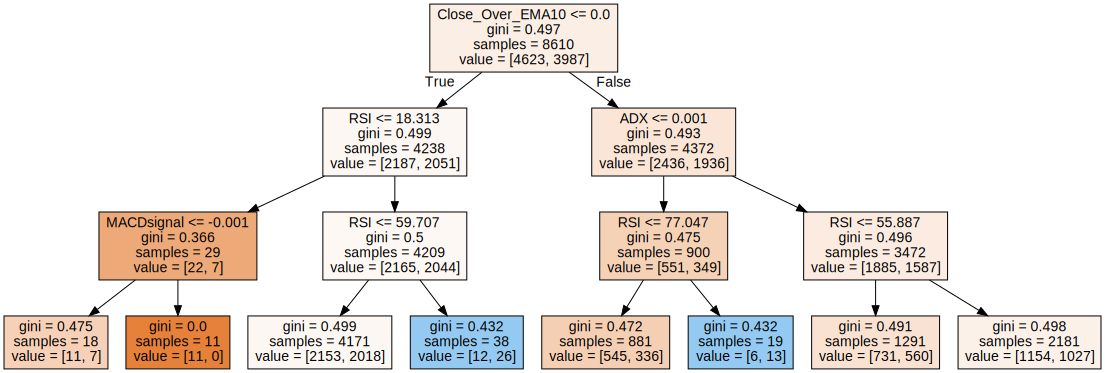

In [84]:
dot_data = tree.export_graphviz(model_dt_clf, out_file=None,filled=True,feature_names=predictors_list_clf)
graphviz.Source(dot_data)

Note that the image only shows the most significant nodes. In this graph we can see all the relevant information in each node:

- the predictor variable used to split the data set.
- the value of Gini impurity.
- the number of data points available at that node.
- the number of target variable data points belonging to each class, 1 and 0.

### Performance analysis

#### Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below.

- __True Positives (TP).__ True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

- __True Negatives (TN).__ True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

- __False Positives (FP).__ False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

- __False Negatives (FN).__ False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [95]:
cm = confusion_matrix(y_cls_test, y_cls_pred, labels=[0,1])
print("Matriz de confusión:\n",cm,end=2*'\n')

# Seleccionar elementos de la matriz de confusión
vp = cm[1][1]
vn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

print(f'True positives - True Long Signal (VP) = {vp}')
print(f'True negatives - True Short Signal (VN) = {vn}')
print(f'False positives - False Long Signal (FP) = {fp}')
print(f'False negatives - False Short Signal (FN) = {fn}')

Matriz de confusión:
 [[1972   10]
 [1697   12]]

True positives - True Long Signal (VP) = 12
True negatives - True Short Signal (VN) = 1972
False positives - False Long Signal (FP) = 10
False negatives - False Short Signal (FN) = 1697


Finally, we can only evaluate the performance of the algorithm on unknown data by comparing it with the result obtained in the training process. To do this we will use the classification_report function of the sklearn.metrics library.

The report shows some parameters that will help us to evaluate the goodness of the algorithm:

- __Accuracy.__ Accuracy measures the percentage of cases that the model has been correct. This is one of the most used and favorite metrics which I recommend you avoid! The problem with accuracy is that it can be misleading, i.e. it can make a bad model look like it is much better than it is.

- __Precision.__ It allow us to measure the quality of the machine learning model in classification tasks. It tells us how many of the correctly predicted cases actually turned out to be positive.In this case, the accuracy is the answer to the question: what percentage of long predictions are correct?

- __Recall.__ Recall metric will tell us how many the machine learning model is able to identify. In our case, recall is the answer to the question: what percentage of long signal are we able to identify?  That is, it tells us how many of the real positive cases we were able to correctly predict with our model.

- __F1-score.__ The F1 value assumes that we care equally about accuracy and completeness. This does not have to be true for all problems. Shows the harmonic mean of precision and recall. It is used to combine the precision and recall measures into a single value. This is practical because it makes it easier to compare the combined performance of accuracy and completeness between various solutions.

- __Support.__ Used as weights to compute the average values of precision, recall and F-1.


Anything above 0.5 is usually considered a good number.

In [98]:
report = classification_report(y_cls_test, y_cls_pred)
print(report)

              precision    recall  f1-score   support

           0       0.54      0.99      0.70      1982
           1       0.55      0.01      0.01      1709

    accuracy                           0.54      3691
   macro avg       0.54      0.50      0.36      3691
weighted avg       0.54      0.54      0.38      3691



Analyzing the metrics of the confusion matrix, the model predicts very accurately the negative class, i.e. a decrease in the rate of change (Short) but does not have the ability to correctly predict the positive class (Long). Therefore, although we have an accuracy of 53.75% in the test set and 53.94% in the training set (we do not seem to have overfitting) the model is not good and we can say that it has underfitting problems.

#### ROC curve

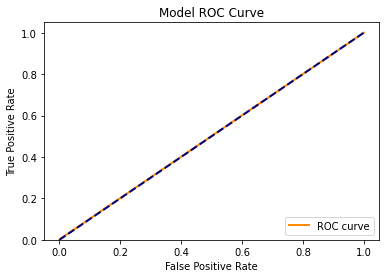

In [108]:
# Compute false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(y_cls_test.values, y_cls_pred)


# Visualization
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Model ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [117]:
# Mostramos los 20 primeros elementos
print('Test =', y_cls_test.values[:20])
print('Pred =', y_cls_pred[:20])

Test = [0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0]
Pred = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


We confirm that the model has not been able to capture the patterns in the data and is therefore not good.